In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import os
from glob import glob
import wget
import requests
import netCDF4 as nc4

In [2]:
lat_min = -25
lat_max = -2
lon_min = -61
lon_max = -42
date_start= '1981-01-01'
date_end = '2020-12-31'
dataset = 'MSWEP'


In [4]:
# Specify the path to the folder containing the NetCDF files
folder_path = r"E:\Veranico_HD\raw_datasets\MSWEP\Daily"
# Open and concatenate all the NetCDF files
mswep = xr.open_mfdataset(os.path.join(folder_path, '*.nc'),combine='nested', concat_dim='time').squeeze()
mswep = mswep.rename({ 'precipitation': 'pr'})
mswep = mswep.assign_coords(lon=(((mswep.lon + 180) % 360) - 180)).sortby('lon')
mswep = mswep.sortby(mswep.lat).sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max), time=slice(date_start, date_end))


c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\xarray\core\indexing.py:1374: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


In [9]:
mswep.to_netcdf(r'E:\Veranico_HD\clean_cerrado\\' + dataset + '.nc')

d:\GU\IC\Veranico\funcs.py:25: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  daa = xr.apply_ufunc(


# EDA

In [11]:
import matplotlib.pyplot as plt
import geopandas as gpd

In [12]:
regions = gpd.read_file(r"D:\GU\IC\Scripts\Data\regions1.geojson")
mm = cdd.where(cdd > 5).mean(dim='time')


c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\xarray\core\indexing.py:1374: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\xarray\core\indexing.py:1374: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
c:\Users\luisg

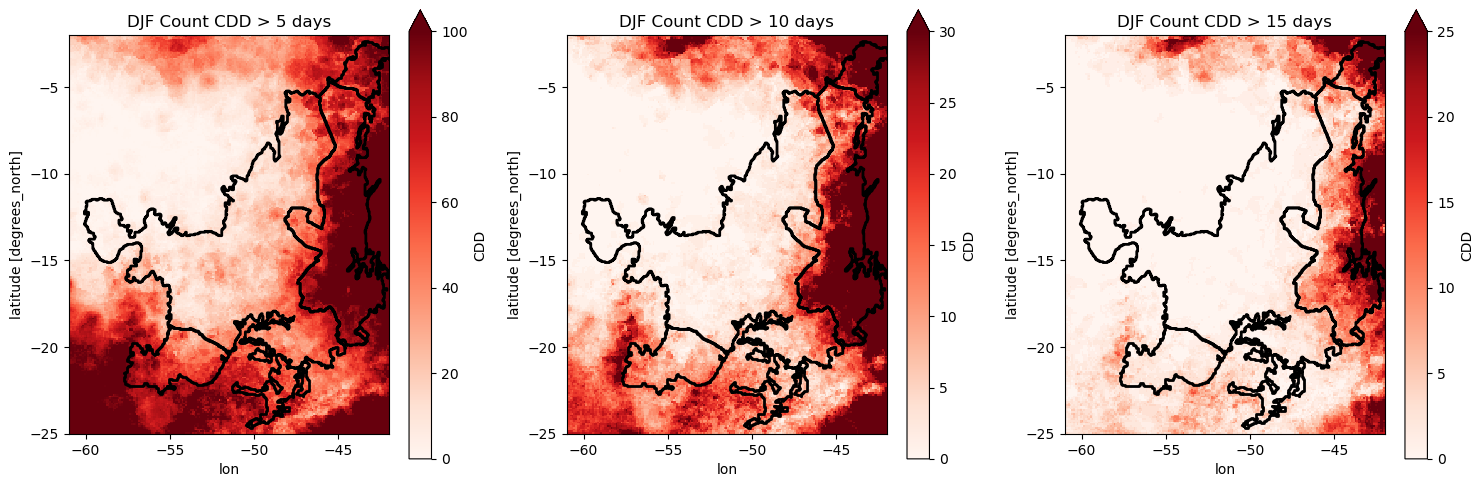

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
cdd.sel(time=cdd['time.season'] == 'DJF').where(cdd > 5).count(dim='time').plot(ax=axs[0],  cmap='Reds', vmax=100)
cdd.sel(time=cdd['time.season'] == 'DJF').where(cdd > 10).count(dim='time').plot(ax=axs[1], cmap='Reds', vmax=30)
cdd.sel(time=cdd['time.season'] == 'DJF').where(cdd > 15).count(dim='time').plot(ax=axs[2], cmap='Reds', vmax=25)
for i in range(3):
    axs[i].set_title('DJF Count CDD > ' + str([5, 10, 15][i]) + ' days')
    regions.plot(ax=axs[i], color='none', edgecolor='black', linewidth=2)

plt.tight_layout()